# Lab Part 1 - Steam Analysis

In [1]:
# standard library imports
import itertools
import re
import math

# third-party imports
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# customisations
pd.set_option("max_columns", 100)
plt.style.use('default')
plt.rcdefaults()
# sns.set() # default seaborn style

In [2]:
df = pd.read_csv(
    filepath_or_buffer = 'datasets/steam/steam.csv',sep=',', decimal = ".", )
list(df.columns) 

['appid',
 'name',
 'release_date',
 'english',
 'developer',
 'publisher',
 'platforms',
 'required_age',
 'categories',
 'genres',
 'steamspy_tags',
 'achievements',
 'positive_ratings',
 'negative_ratings',
 'average_playtime',
 'median_playtime',
 'owners',
 'price']

In [3]:
df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [4]:
def get_unique(series):
    """Get unique values from a Pandas series containing semi-colon delimited strings."""
    return set(list(itertools.chain(*series.apply(lambda x: [c for c in x.split(';')]))))


In [5]:
get_unique(df['categories'])
get_unique(df['genres'])
get_unique(df['platforms'])
get_unique(df['steamspy_tags'])



{'1980s',
 "1990's",
 '2.5D',
 '2D',
 '2D Fighter',
 '360 Video',
 '3D',
 '3D Platformer',
 '3D Vision',
 '4 Player Local',
 '4X',
 '6DOF',
 'Abstract',
 'Action',
 'Action RPG',
 'Action-Adventure',
 'Adventure',
 'Agriculture',
 'Aliens',
 'Alternate History',
 'America',
 'Animation & Modeling',
 'Anime',
 'Arcade',
 'Arena Shooter',
 'Assassin',
 'Atmospheric',
 'Audio Production',
 'BMX',
 'Base-Building',
 'Baseball',
 'Basketball',
 'Batman',
 'Battle Royale',
 "Beat 'em up",
 'Beautiful',
 'Benchmark',
 'Bikes',
 'Blood',
 'Board Game',
 'Bowling',
 'Building',
 'Bullet Hell',
 'Bullet Time',
 'CRPG',
 'Capitalism',
 'Card Game',
 'Cartoon',
 'Cartoony',
 'Casual',
 'Cats',
 'Character Action Game',
 'Character Customization',
 'Chess',
 'Choices Matter',
 'Choose Your Own Adventure',
 'Cinematic',
 'City Builder',
 'Class-Based',
 'Classic',
 'Clicker',
 'Co-op',
 'Cold War',
 'Colorful',
 'Comedy',
 'Comic Book',
 'Competitive',
 'Controller',
 'Conversation',
 'Crafting',
 '

In [6]:
def processPlattform(df):
    plat_cols = get_unique(df['platforms'])
    
    # create a new column for each platform, with 1s indicating membership and 0s for non-members
    for col in sorted(plat_cols):
        plat_name = re.sub(r'[\s\-\/]', '_', col.lower())
        plat_name = re.sub(r'[()]', '', plat_name)
        
        df[plat_name] = df['platforms'].apply(lambda x: 1 if col in x.split(';') else 0)

In [7]:
def process_cat_gen_tag(df):
    """Process categories, genres, steamspy_tags and platform columns."""
    # get all unique plattform names
    plat_cols = get_unique(df['platforms'])
    
    # create a new column for each platform, with 1s indicating membership and 0s for non-members
    for col in sorted(plat_cols):
        plat_name = re.sub(r'[\s\-\/]', '_', col.lower())
        plat_name = re.sub(r'[()]', '', plat_name)
        
        df[plat_name] = df['platforms'].apply(lambda x: 1 if col in x.split(';') else 0)
    
    # get all unique category names
    cat_cols = get_unique(df['categories'])
    
    # create a new column for each category, with 1s indicating membership and 0s for non-members
    for col in sorted(cat_cols):
        col_name = re.sub(r'[\s\-\/]', '_', col.lower())
        col_name = re.sub(r'[()]', '', col_name)
        
        df[col_name] = df['categories'].apply(lambda x: 1 if col in x.split(';') else 0)
        
    # repeat for genre column names (get_unique used to find unique genre names, 
    # not necessary but useful if keeping all of them)
    gen_cols = get_unique(df['genres'])  
    gen_col_names = []
    
    # create new columns for each genre with 1s for games of that genre
    for col in sorted(gen_cols):
        col_name = col.lower().replace('&', 'and').replace(' ', '_')
        gen_col_names.append(col_name)
        
        df[col_name] = df['genres'].apply(lambda x: 1 if col in x.split(';') else 0)
        # alternate method using np.where:
        # df[col_name] = np.where(df['genres'].str.contains(col), 1, 0)
    
    # not using steamspy tags for now, as mostly overlap with genres
    # here's one way we could deal with them:
    tag_cols = get_unique(df['steamspy_tags'])
    df['top_tag'] = df['steamspy_tags'].apply(lambda x: x.split(';')[0])
    
    # remove redundant columns and return dataframe (keeping genres column for reference)
    df = df.drop(['categories', 'steamspy_tags','platforms'], axis=1)
    
    return df

In [8]:
def handleMultipleItemColumn(df,column,sep):
    df[column] = df[column].apply(lambda x: x.split(sep))

In [9]:
def calc_rating(row):
    """Calculate rating score based on SteamDB method."""
    import math

    pos = row['positive_ratings']
    neg = row['negative_ratings']

    total_reviews = pos + neg
    average = pos / total_reviews
    
    # pulls score towards 50, pulls more strongly for games with few reviews
    score = average - (average*0.5) * 2**(-math.log10(total_reviews + 1))

    return score * 100

In [10]:
def mapPlatform(row):
    platformArr = row.split(';')
    platformArr.sort()
    return   ' and '.join(platformArr)

In [11]:
def pre_process():
    """Preprocess Steam dataset for exploratory analysis."""
    df = pd.read_csv(filepath_or_buffer = 'datasets/steam/steam.csv',sep=',', decimal = ".")
    
    # keep lower and higher bound of owners column, as integer
    df['owners_low_bound'] = df['owners'].str.split('-').apply(lambda x: x[0]).astype(int)
    df['owners_high_bound'] = df['owners'].str.split('-').apply(lambda x: x[1]).astype(int)
    del df['owners']
    
    # calculate rating, as well as simple ratio for comparison
    df['total_ratings'] = df['positive_ratings'] + df['negative_ratings']
    df['rating_ratio'] = df['positive_ratings'] / df['total_ratings']
    df['rating'] = df.apply(calc_rating, axis=1)
    
    # convert release_date to datetime type and create separate column for release_year
    df['release_date'] = df['release_date'].astype('datetime64[ns]')
    df['release_year'] = df['release_date'].apply(lambda x: x.year)
    
    # process genres, categories and steamspy_tag columns
    #df = process_cat_gen_tag(df)
    df['platforms_all'] = df['platforms'].apply(lambda x: mapPlatform(x))
    processPlattform(df)
    handleMultipleItemColumn(df,'platforms',';')
    handleMultipleItemColumn(df,'categories',';')
    df['top_tag'] = df['steamspy_tags'].apply(lambda x: x.split(';')[0])
    handleMultipleItemColumn(df,'steamspy_tags',';')
    handleMultipleItemColumn(df,'developer',';')
    handleMultipleItemColumn(df,'publisher',';')
    
    # Create a column to split free vs paid games
    df['type'] = 'Free'
    df.loc[df['price'] > 0, 'type'] = 'Paid'
    
    # Add Value total playtime
    df['total_playtime'] = df.apply (lambda row: row.average_playtime*row.owners_low_bound, axis=1)

    # Add Value total playtime
    df['estimated_revenue'] = df.apply (lambda row: row.price*row.owners_low_bound, axis=1)

    return df

In [12]:
processedDF = pre_process()
pDF = processedDF 

In [13]:
processedDF.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,owners_low_bound,owners_high_bound,total_ratings,rating_ratio,rating,release_year,platforms_all,linux,mac,windows,top_tag,type,total_playtime,estimated_revenue
0,10,Counter-Strike,2000-11-01,1,[Valve],[Valve],"[windows, mac, linux]",0,"[Multi-player, Online Multi-Player, Local Mult...",Action,"[Action, FPS, Multiplayer]",0,124534,3339,17612,317,7.19,10000000,20000000,127873,0.973888,95.975678,2000,linux and mac and windows,1,1,1,Action,Paid,176120000000,71900000.0
1,20,Team Fortress Classic,1999-04-01,1,[Valve],[Valve],"[windows, mac, linux]",0,"[Multi-player, Online Multi-Player, Local Mult...",Action,"[Action, FPS, Multiplayer]",0,3318,633,277,62,3.99,5000000,10000000,3951,0.839787,80.508259,1999,linux and mac and windows,1,1,1,Action,Paid,1385000000,19950000.0
2,30,Day of Defeat,2003-05-01,1,[Valve],[Valve],"[windows, mac, linux]",0,"[Multi-player, Valve Anti-Cheat enabled]",Action,"[FPS, World War II, Multiplayer]",0,3416,398,187,34,3.99,5000000,10000000,3814,0.895648,85.823915,2003,linux and mac and windows,1,1,1,FPS,Paid,935000000,19950000.0
3,40,Deathmatch Classic,2001-06-01,1,[Valve],[Valve],"[windows, mac, linux]",0,"[Multi-player, Online Multi-Player, Local Mult...",Action,"[Action, FPS, Multiplayer]",0,1273,267,258,184,3.99,5000000,10000000,1540,0.826623,78.126542,2001,linux and mac and windows,1,1,1,Action,Paid,1290000000,19950000.0
4,50,Half-Life: Opposing Force,1999-11-01,1,[Gearbox Software],[Valve],"[windows, mac, linux]",0,"[Single-player, Multi-player, Valve Anti-Cheat...",Action,"[FPS, Action, Sci-fi]",0,5250,288,624,415,3.99,5000000,10000000,5538,0.947996,91.260480,1999,linux and mac and windows,1,1,1,FPS,Paid,3120000000,19950000.0


In [14]:
list(processedDF.columns) 
processedDF.shape

(27075, 31)

In [15]:
processedDF.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,owners_low_bound,owners_high_bound,total_ratings,rating_ratio,rating,release_year,linux,mac,windows,total_playtime,estimated_revenue
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000,2.707500e+04,2.707500e+04,2.707500e+04,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,2.707500e+04,2.707500e+04
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193,8.012669e+04,1.880543e+05,1.211586e+03,0.714478,58.830540,2016.498098,0.193352,0.297913,0.999815,2.886696e+08,6.953147e+05
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922,8.708977e+05,1.786801e+06,2.242909e+04,0.233594,20.100043,2.156990,0.394934,0.457350,0.013588,1.767700e+10,9.673244e+06
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000e+00,2.000000e+04,1.000000e+00,0.000000,0.000000,1997.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000,0.000000e+00,2.000000e+04,1.000000e+01,0.583333,47.136581,2016.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000,0.000000e+00,2.000000e+04,3.600000e+01,0.760331,62.651461,2017.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000,2.000000e+04,5.000000e+04,1.760000e+02,0.893905,73.483405,2018.000000,0.000000,1.000000,1.000000,0.000000e+00,1.580000e+04
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000,1.000000e+08,2.000000e+08,3.046717e+06,1.000000,97.257760,2019.000000,1.000000,1.000000,1.000000,2.394400e+12,1.349500e+09


In [16]:
# Filter Games mit wenig Usernb

<AxesSubplot:>

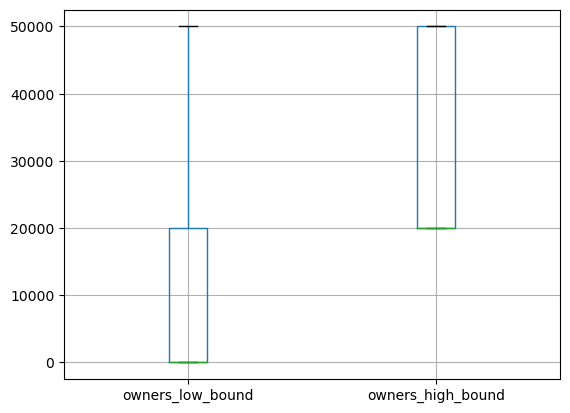

In [17]:
pDF.boxplot(column=['owners_low_bound','owners_high_bound'], return_type='axes',showfliers=False)

In [18]:
#indexNames = pDF[ pDF['owners_low_bound'] < 5000 ].index
# Delete these row indexes from dataFrame
#pDF.drop(indexNames , inplace=True)
#len(indexNames)

In [19]:
pDF.shape

(27075, 31)

Text(0.5, 1.0, 'Combination median_playtime,owners_low_bound ')

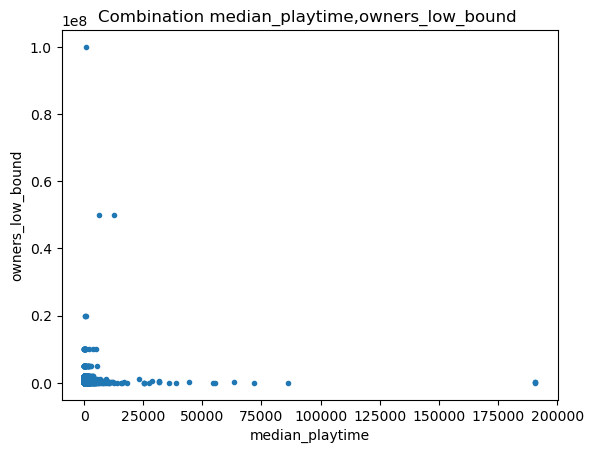

In [20]:
#Unterschied playtime vs price
xCol = 'median_playtime'
yCol = 'owners_low_bound' 


color =  np.array(['red','blue'])
plt.scatter(marker='.',x=pDF[xCol],y=pDF[yCol])
plt.xlabel(xCol)
plt.ylabel(yCol)
plt.title('Combination '+xCol+','+yCol +' ')


In [21]:
processedDF.sort_values(by='median_playtime',ascending=False)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,owners_low_bound,owners_high_bound,total_ratings,rating_ratio,rating,release_year,platforms_all,linux,mac,windows,top_tag,type,total_playtime,estimated_revenue
9201,474030,The Abbey of Crime Extensum,2016-05-19,1,"[Manuel Pazos, Daniel Celemín]","[Manuel Pazos, Daniel Celemín]","[windows, mac, linux]",0,[Single-player],Adventure;Free to Play,"[Free to Play, Adventure, Retro]",0,146,22,190625,190625,0.00,50000,100000,168,0.869048,77.628930,2016,linux and mac and windows,1,1,1,Free to Play,Free,9531250000,0.0
1478,219340,The Banner Saga: Factions,2013-02-25,1,[Stoic],[Versus Evil],"[windows, mac]",0,"[Multi-player, Cross-Platform Multiplayer]",Free to Play;Indie;RPG;Strategy,"[Free to Play, Strategy, RPG]",42,569,202,95245,190489,0.00,200000,500000,771,0.738003,68.814073,2013,mac and windows,0,1,1,Free to Play,Free,19049000000,0.0
6014,380140,The Secret of Tremendous Corporation,2015-10-12,1,"[Sebastian Krzyszkowiak, Konrad Burandt, Paweł...",[dosowisko.net],"[windows, linux]",0,"[Single-player, Captions available, Steam Cloud]",Adventure;Casual;Free to Play;Indie,"[Free to Play, Adventure, Indie]",0,218,50,95242,190445,0.00,100000,200000,268,0.813433,73.794736,2015,linux and windows,1,0,1,Free to Play,Free,9524200000,0.0
2023,252690,Fantasy Grounds,2014-05-09,1,"[SmiteWorks USA, LLC]","[SmiteWorks USA, LLC]","[windows, mac]",0,"[Multi-player, Co-op, Cross-Platform Multiplayer]",Indie;RPG;Strategy,"[RPG, Strategy, Software]",0,377,100,43074,86148,29.99,20000,50000,477,0.790356,72.866781,2014,mac and windows,0,1,1,RPG,Paid,861480000,599800.0
23409,892420,懒人修仙传,2018-11-14,0,[托更的修罗],[托更的修罗],[windows],0,[Single-player],Casual;Indie;RPG;Simulation,"[Simulation, Indie, Casual]",0,404,164,43632,71857,2.89,20000,50000,568,0.711268,65.858932,2018,windows,0,0,1,Simulation,Paid,872640000,57800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11913,553450,The Purge Day,2016-11-25,1,[Red Limb Studio],[Red Limb Studio ],[windows],0,"[Single-player, Steam Achievements, Full contr...",Violent;Action;Indie,"[Indie, Action, Violent]",14,22,16,0,0,1.99,0,20000,38,0.578947,48.286340,2016,windows,0,0,1,Indie,Paid,0,0.0
11912,553440,R.A.T.S. (Regulatory Astro-Topographical Stabi...,2017-02-15,1,[Mark Miller Studios],[I.E.D. Studios],[windows],0,"[Single-player, Steam Achievements, Partial Co...",Action;Indie,"[Action, Indie]",9,9,2,0,0,0.00,0,20000,11,0.818182,62.456017,2017,windows,0,0,1,Action,Free,0,0.0
11911,553430,Skill Master VR -- Learn Meditation,2016-11-21,1,"[fletcher.richman, owockitalki]",[Boulder VR Studios],[windows],0,"[Single-player, Steam Achievements]",Indie;Early Access,"[Early Access, Indie, Casual]",9,3,2,0,0,10.99,0,20000,5,0.600000,42.506594,2016,windows,0,0,1,Early Access,Paid,0,0.0
11910,553410,Pirate Defense,2016-11-11,1,"[Rushil Reddy, Christiane Snyder]",[Rushil Reddy],[windows],0,"[Single-player, Steam Trading Cards]",Strategy,"[Strategy, VR, Tower Defense]",0,5,5,0,0,6.99,0,20000,10,0.500000,37.853544,2016,windows,0,0,1,Strategy,Paid,0,0.0


In [22]:
processedDF['owners_low_bound'].median()

0.0

## Top played games
Get the top x% of Games based on User

In [23]:
percent = 50
pDF.sort_values(by='owners_low_bound',ascending=False)
numberOfTopGames = math.ceil(len(pDF.index) * percent / 100 )
print("total number",len(pDF.index))
print("top",percent,"%",numberOfTopGames)


total number 27075
top 50 % 13538


In [24]:
topPDF = pDF.sort_values(by='owners_low_bound',ascending=False).head(numberOfTopGames)

In [25]:
#topPDF

In [26]:
def scatterPlot(df,xCol,yCol,color):
    color =  np.array(['red','blue'])
    plt.scatter(marker='.',x=df[xCol],y=df[yCol])
    plt.xlabel(xCol)
    plt.ylabel(yCol)
    plt.title('Combination '+xCol+','+yCol +' ')
    

In [27]:
#scatterPlot(topPDF,'release_year','type','')

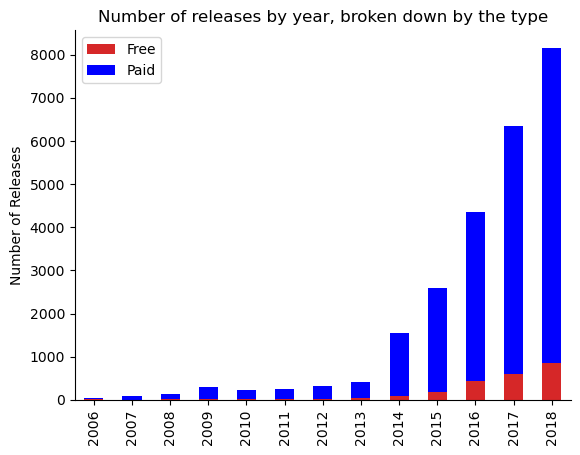

In [28]:
# Release per Year
df = pDF.copy()

years = []
lt_20k = []
gt_20k = []

for year in sorted(df['release_year'].unique()):
    if year < 2006 or year > 2018:
        # very few releases in data prior to 2006, and we're still in 2019 (at time of writing)
        # so ignore these years
        continue
    
    # subset dataframe by year
    year_df = df[df.release_year == year]
    
    # calculate total with less than 20,000 owners, and total with 20,000 or more
    total_lt_20k = year_df[year_df.type == "Free"].shape[0]
    total_gt_20k = year_df[year_df.type == "Paid"].shape[0]
    
    years.append(year)
    lt_20k.append(total_lt_20k)
    gt_20k.append(total_gt_20k)
    
owners_df = pd.DataFrame(zip(years, lt_20k, gt_20k), 
                         columns=['year', 'Free', 'Paid'])

ax = owners_df.plot(x='year', y=[1, 2], kind='bar', stacked=True, color=['tab:red', 'blue'])

ax.set_xlabel('')
ax.set_ylabel('Number of Releases')
ax.set_title('Number of releases by year, broken down by the type')
sns.despine()
plt.show()

In [29]:
#df = topPDF.copy()
#df['total_playtime'] = df.apply (lambda row: row.average_playtime*row.owners_low_bound, axis=1)
#topPDF.sort_values(by='total_playtime',ascending=False)

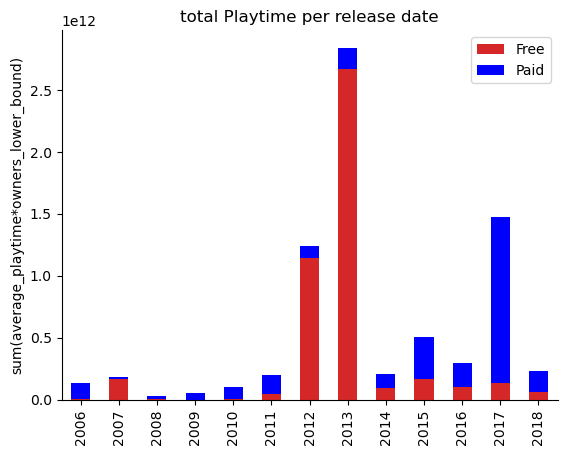

In [30]:
# Playtime ( sum(average_playtime*owners_lower_bound) ) per Year
df = pDF.copy()

#df['total_playtime'] = df.apply (lambda row: row.average_playtime*row.owners_low_bound, axis=1)

years = []
lt_20k = []
gt_20k = []

for year in sorted(df['release_year'].unique()):
    if year < 2006 or year > 2018:
        # very few releases in data prior to 2006, and we're still in 2019 (at time of writing)
        # so ignore these years
        continue
    
    # subset dataframe by year
    year_df = df[df.release_year == year]
    
    # calculate total with less than 20,000 owners, and total with 20,000 or more
    total_lt_20k = year_df[year_df.type == "Free"]['total_playtime'].sum()
    total_gt_20k = year_df[year_df.type == "Paid"]['total_playtime'].sum()
    
    years.append(year)
    lt_20k.append(total_lt_20k)
    gt_20k.append(total_gt_20k)
    
owners_df = pd.DataFrame(zip(years, lt_20k, gt_20k), 
                         columns=['year', 'Free', 'Paid'])

ax = owners_df.plot(x='year', y=[1, 2], kind='bar', stacked=True, color=['tab:red', 'blue'])

ax.set_xlabel('')
ax.set_ylabel('sum(average_playtime*owners_lower_bound)')
ax.set_title('total Playtime per release date')
sns.despine()
plt.show()

### Aussage

Es gibt ein paar Spiele die extrem populär sind und mehr spielzeit generieren als tausende andere spiele zusammen.


FREE 0.6140612525625283
PAID 0.3859387474374717


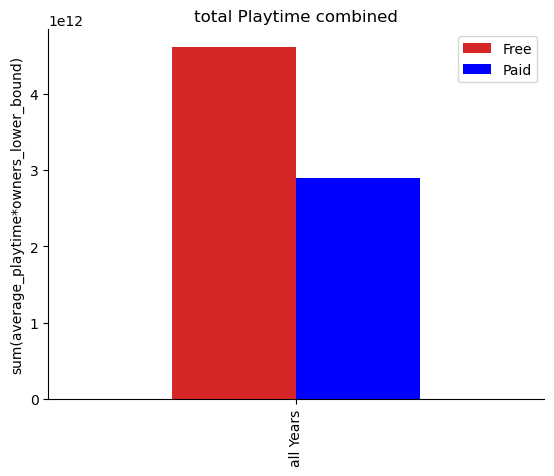

In [31]:
# Playtime ( sum(average_playtime*owners_lower_bound) ) per Year
df = pDF.copy()

#df['total_playtime'] = df.apply (lambda row: row.average_playtime*row.owners_low_bound, axis=1)

years = []
lt_20k = []
gt_20k = []

for year in sorted(df['release_year'].unique()):
    if year < 2006 or year > 2018:
        # very few releases in data prior to 2006, and we're still in 2019 (at time of writing)
        # so ignore these years
        continue
    
    # subset dataframe by year
    year_df = df[df.release_year == year]
    
    # calculate total with less than 20,000 owners, and total with 20,000 or more
    total_lt_20k = year_df[year_df.type == "Free"]['total_playtime'].sum()
    total_gt_20k = year_df[year_df.type == "Paid"]['total_playtime'].sum()
    
    years.append(year)
    lt_20k.append(total_lt_20k)
    gt_20k.append(total_gt_20k)
    
    
years = ['all Years']
gesamtlt = np.sum(lt_20k)
gesamtgt = np.sum(gt_20k)

gesamtGesamt = gesamtlt + gesamtgt

print("FREE",gesamtlt / gesamtGesamt)
print("PAID",gesamtgt / gesamtGesamt)


owners_df = pd.DataFrame(zip(years, [gesamtlt], [gesamtgt]), 
                         columns=['year', 'Free', 'Paid'])

ax = owners_df.plot(x='year', y=[1, 2], kind='bar', stacked=False, color=['tab:red', 'blue'])

ax.set_xlabel('')
ax.set_ylabel('sum(average_playtime*owners_lower_bound)')
ax.set_title('total Playtime combined')
sns.despine()
plt.show()

In [32]:
pDF.sort_values(by='total_playtime',ascending=False).head(20)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,owners_low_bound,owners_high_bound,total_ratings,rating_ratio,rating,release_year,platforms_all,linux,mac,windows,top_tag,type,total_playtime,estimated_revenue
22,570,Dota 2,2013-07-09,1,[Valve],[Valve],"[windows, mac, linux]",0,"[Multi-player, Co-op, Steam Trading Cards, Ste...",Action;Free to Play;Strategy,"[Free to Play, MOBA, Strategy]",0,863507,142079,23944,801,0.00,100000000,200000000,1005586,0.858710,85.201281,2013,linux and mac and windows,1,1,1,Free to Play,Free,2394400000000,0.000000e+00
12836,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,1,[PUBG Corporation],[PUBG Corporation],[windows],0,"[Multi-player, Online Multi-Player, Stats]",Action;Adventure;Massively Multiplayer,"[Survival, Shooter, Multiplayer]",37,496184,487076,22938,12434,26.99,50000000,100000000,983260,0.504632,50.066901,2017,windows,0,0,1,Survival,Paid,1146900000000,1.349500e+09
25,730,Counter-Strike: Global Offensive,2012-08-21,1,"[Valve, Hidden Path Entertainment]",[Valve],"[windows, mac, linux]",0,"[Multi-player, Steam Achievements, Full contro...",Action;Free to Play,"[FPS, Multiplayer, Shooter]",167,2644404,402313,22494,6502,0.00,50000000,100000000,3046717,0.867952,86.310312,2012,linux and mac and windows,1,1,1,FPS,Free,1124700000000,0.000000e+00
0,10,Counter-Strike,2000-11-01,1,[Valve],[Valve],"[windows, mac, linux]",0,"[Multi-player, Online Multi-Player, Local Mult...",Action,"[Action, FPS, Multiplayer]",0,124534,3339,17612,317,7.19,10000000,20000000,127873,0.973888,95.975678,2000,linux and mac and windows,1,1,1,Action,Paid,176120000000,7.190000e+07
19,440,Team Fortress 2,2007-10-10,1,[Valve],[Valve],"[windows, mac, linux]",0,"[Multi-player, Cross-Platform Multiplayer, Ste...",Action;Free to Play,"[Free to Play, Multiplayer, FPS]",520,515879,34036,8495,623,0.00,20000000,50000000,549915,0.938107,92.933233,2007,linux and mac and windows,1,1,1,Free to Play,Free,169900000000,0.000000e+00
121,4000,Garry's Mod,2006-11-29,1,[Facepunch Studios],[Valve],"[windows, mac, linux]",0,"[Single-player, Multi-player, Co-op, Cross-Pla...",Indie;Simulation,"[Sandbox, Multiplayer, Funny]",29,363721,16433,12422,1875,6.99,10000000,20000000,380154,0.956773,94.677179,2006,linux and mac and windows,1,1,1,Sandbox,Paid,124220000000,6.990000e+07
1634,230410,Warframe,2013-03-25,1,[Digital Extremes],[Digital Extremes],[windows],16,"[Single-player, Multi-player, Co-op, Steam Tra...",Action;Free to Play,"[Free to Play, Action, Co-op]",187,226541,20268,5845,394,0.00,20000000,50000000,246809,0.917880,90.695302,2013,windows,0,0,1,Free to Play,Free,116900000000,0.000000e+00
2478,271590,Grand Theft Auto V,2015-04-13,1,[Rockstar North],[Rockstar Games],[windows],18,"[Single-player, Multi-player, Steam Achievemen...",Action;Adventure,"[Open World, Action, Multiplayer]",77,329061,139308,9837,4834,24.99,10000000,20000000,468369,0.702568,69.567115,2015,windows,0,0,1,Open World,Paid,98370000000,2.499000e+08
1025,72850,The Elder Scrolls V: Skyrim,2011-11-10,1,[Bethesda Game Studios],[Bethesda Softworks],[windows],16,"[Single-player, Steam Achievements, Steam Trad...",RPG,"[Open World, RPG, Fantasy]",75,237303,14951,7089,3885,9.99,10000000,20000000,252254,0.940730,92.960488,2011,windows,0,0,1,Open World,Paid,70890000000,9.990000e+07
4712,346110,ARK: Survival Evolved,2017-08-27,1,"[Studio Wildcard, Instinct Games, Efecto Studi...",[Studio Wildcard],"[windows, mac, linux]",0,"[Single-player, Multi-player, MMO, Co-op, Stea...",Action;Adventure;Indie;Massively Multiplayer;RPG,"[Survival, Open World, Multiplayer]",32,145035,66603,14154,1470,44.99,5000000,10000000,211638,0.685298,67.675307,2017,linux and mac and windows,1,1,1,Survival,Paid,70770000000,2.249500e+08


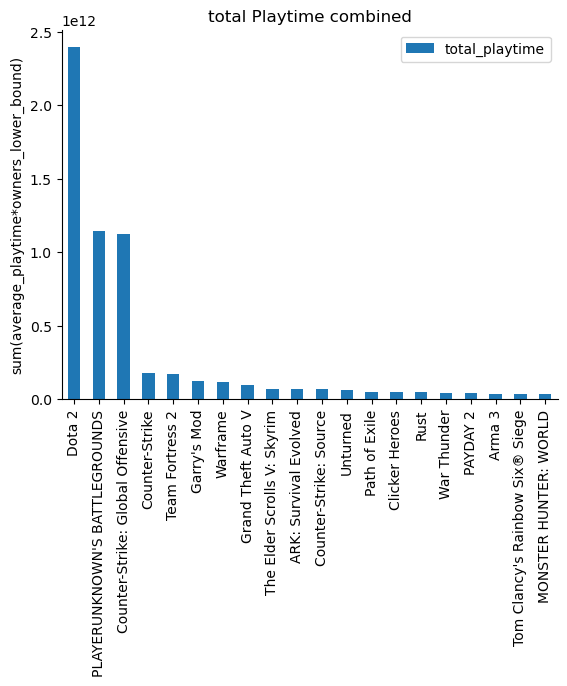

In [33]:
data = pDF.sort_values(by='total_playtime',ascending=False).head(20)

ax = data.plot(x='name', y='total_playtime', kind='bar', stacked=False)
ax.set_xlabel('')
ax.set_ylabel('sum(average_playtime*owners_lower_bound)')
ax.set_title('total Playtime combined')
sns.despine()
plt.show()

In [34]:
top3Playtime = pDF.sort_values(by='total_playtime',ascending=False).head(3)[('total_playtime')].sum()
allOtherPlaytime = pDF.sort_values(by='total_playtime',ascending=True).head((27075-3))[('total_playtime')].sum()

totalPlaytimeAll = pDF['total_playtime'].sum()
print("top3Playtime:",top3Playtime*100/totalPlaytimeAll)
print("allOtherPlaytime:",allOtherPlaytime*100/totalPlaytimeAll)



top3Playtime: 59.700122624768376
allOtherPlaytime: 40.299877375231624


## Insight 2

In [35]:
tptPDF = pDF.sort_values('total_playtime',ascending=False).head(math.ceil(27075*0.01))
tptPDF

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,owners_low_bound,owners_high_bound,total_ratings,rating_ratio,rating,release_year,platforms_all,linux,mac,windows,top_tag,type,total_playtime,estimated_revenue
22,570,Dota 2,2013-07-09,1,[Valve],[Valve],"[windows, mac, linux]",0,"[Multi-player, Co-op, Steam Trading Cards, Ste...",Action;Free to Play;Strategy,"[Free to Play, MOBA, Strategy]",0,863507,142079,23944,801,0.00,100000000,200000000,1005586,0.858710,85.201281,2013,linux and mac and windows,1,1,1,Free to Play,Free,2394400000000,0.000000e+00
12836,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,1,[PUBG Corporation],[PUBG Corporation],[windows],0,"[Multi-player, Online Multi-Player, Stats]",Action;Adventure;Massively Multiplayer,"[Survival, Shooter, Multiplayer]",37,496184,487076,22938,12434,26.99,50000000,100000000,983260,0.504632,50.066901,2017,windows,0,0,1,Survival,Paid,1146900000000,1.349500e+09
25,730,Counter-Strike: Global Offensive,2012-08-21,1,"[Valve, Hidden Path Entertainment]",[Valve],"[windows, mac, linux]",0,"[Multi-player, Steam Achievements, Full contro...",Action;Free to Play,"[FPS, Multiplayer, Shooter]",167,2644404,402313,22494,6502,0.00,50000000,100000000,3046717,0.867952,86.310312,2012,linux and mac and windows,1,1,1,FPS,Free,1124700000000,0.000000e+00
0,10,Counter-Strike,2000-11-01,1,[Valve],[Valve],"[windows, mac, linux]",0,"[Multi-player, Online Multi-Player, Local Mult...",Action,"[Action, FPS, Multiplayer]",0,124534,3339,17612,317,7.19,10000000,20000000,127873,0.973888,95.975678,2000,linux and mac and windows,1,1,1,Action,Paid,176120000000,7.190000e+07
19,440,Team Fortress 2,2007-10-10,1,[Valve],[Valve],"[windows, mac, linux]",0,"[Multi-player, Cross-Platform Multiplayer, Ste...",Action;Free to Play,"[Free to Play, Multiplayer, FPS]",520,515879,34036,8495,623,0.00,20000000,50000000,549915,0.938107,92.933233,2007,linux and mac and windows,1,1,1,Free to Play,Free,169900000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6433,391540,Undertale,2015-09-15,1,[tobyfox],[tobyfox],"[windows, mac, linux]",0,"[Single-player, Steam Trading Cards]",Indie;RPG,"[Great Soundtrack, Story Rich, Choices Matter]",0,97832,4496,679,443,6.99,2000000,5000000,102328,0.956063,94.122755,2015,linux and mac and windows,1,1,1,Great Soundtrack,Paid,1358000000,1.398000e+07
5553,367500,Dragon's Dogma: Dark Arisen,2016-01-15,1,[Capcom],[Capcom],[windows],0,"[Single-player, Steam Achievements, Full contr...",Action;Adventure;RPG,"[RPG, Open World, Character Customization]",59,12856,1688,1355,1137,23.99,1000000,2000000,14544,0.883938,85.926151,2016,windows,0,0,1,RPG,Paid,1355000000,2.399000e+07
1773,239030,"Papers, Please",2013-08-08,1,[Lucas Pope],[3909],"[windows, mac, linux]",0,"[Single-player, Steam Achievements, Steam Trad...",Adventure;Indie,"[Indie, Political, Simulation]",13,25587,1103,674,214,6.99,2000000,5000000,26690,0.958674,93.638047,2013,linux and mac and windows,1,1,1,Indie,Paid,1348000000,1.398000e+07
357,15370,Heroes of Might & Magic V: Tribes of the East,2008-10-10,1,[Nival],[Ubisoft],[windows],0,[Single-player],Strategy,"[Strategy, Turn-Based Strategy, Turn-Based]",0,759,66,6679,6679,8.59,200000,500000,825,0.920000,85.909410,2008,windows,0,0,1,Strategy,Paid,1335800000,1.718000e+06


In [36]:
pDF.sort_values(by='estimated_revenue',ascending=False).head(20)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,owners_low_bound,owners_high_bound,total_ratings,rating_ratio,rating,release_year,platforms_all,linux,mac,windows,top_tag,type,total_playtime,estimated_revenue
12836,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,1,[PUBG Corporation],[PUBG Corporation],[windows],0,"[Multi-player, Online Multi-Player, Stats]",Action;Adventure;Massively Multiplayer,"[Survival, Shooter, Multiplayer]",37,496184,487076,22938,12434,26.99,50000000,100000000,983260,0.504632,50.066901,2017,windows,0,0,1,Survival,Paid,1146900000000,1.349500e+09
12965,582010,MONSTER HUNTER: WORLD,2018-08-09,1,"[CAPCOM Co., Ltd.]","[CAPCOM Co., Ltd.]",[windows],0,"[Single-player, Multi-player, Co-op, Steam Ach...",Action,"[Action, Hunting, Multiplayer]",50,72029,35294,6512,5372,49.99,5000000,10000000,107323,0.671142,66.087643,2018,windows,0,0,1,Action,Paid,32560000000,2.499500e+08
2478,271590,Grand Theft Auto V,2015-04-13,1,[Rockstar North],[Rockstar Games],[windows],18,"[Single-player, Multi-player, Steam Achievemen...",Action;Adventure,"[Open World, Action, Multiplayer]",77,329061,139308,9837,4834,24.99,10000000,20000000,468369,0.702568,69.567115,2015,windows,0,0,1,Open World,Paid,98370000000,2.499000e+08
4712,346110,ARK: Survival Evolved,2017-08-27,1,"[Studio Wildcard, Instinct Games, Efecto Studi...",[Studio Wildcard],"[windows, mac, linux]",0,"[Single-player, Multi-player, MMO, Co-op, Stea...",Action;Adventure;Indie;Massively Multiplayer;RPG,"[Survival, Open World, Multiplayer]",32,145035,66603,14154,1470,44.99,5000000,10000000,211638,0.685298,67.675307,2017,linux and mac and windows,1,1,1,Survival,Paid,70770000000,2.249500e+08
22458,863550,HITMAN™ 2,2018-11-13,1,[IO Interactive A/S],[Warner Bros Interactive Entertainment],[windows],0,"[Single-player, Online Multi-Player, Online Co...",Action,"[Stealth, Action, Assassin]",125,10814,1756,636,514,44.99,5000000,10000000,12570,0.860302,83.520727,2018,windows,0,0,1,Stealth,Paid,3180000000,2.249500e+08
2016,252490,Rust,2018-02-08,1,[Facepunch Studios],[Facepunch Studios],"[windows, mac]",18,"[Multi-player, Online Multi-Player, MMO, Co-op...",Action;Adventure;Indie;Massively Multiplayer;RPG,"[Survival, Crafting, Multiplayer]",48,220370,53709,9352,2234,27.79,5000000,10000000,274079,0.804038,79.476392,2018,mac and windows,0,1,1,Survival,Paid,46760000000,1.389500e+08
2964,292030,The Witcher® 3: Wild Hunt,2015-05-18,1,[CD PROJEKT RED],[CD PROJEKT RED],[windows],0,"[Single-player, Steam Achievements, Full contr...",RPG,"[Open World, RPG, Story Rich]",78,202930,4798,3068,2002,24.99,5000000,10000000,207728,0.976902,96.465364,2015,windows,0,0,1,Open World,Paid,15340000000,1.249500e+08
2087,255710,Cities: Skylines,2015-03-10,1,[Colossal Order Ltd.],[Paradox Interactive],"[windows, mac, linux]",0,"[Single-player, Steam Achievements, Steam Trad...",Simulation;Strategy,"[City Builder, Simulation, Building]",97,67553,6005,3225,444,22.99,5000000,10000000,73558,0.918364,90.262459,2015,linux and mac and windows,1,1,1,City Builder,Paid,16125000000,1.149500e+08
2878,289070,Sid Meier’s Civilization® VI,2016-10-20,1,"[Firaxis Games, Aspyr (Mac), Aspyr (Linux)]","[2K, Aspyr (Mac), Aspyr (Linux)]","[windows, mac, linux]",0,"[Single-player, Multi-player, Steam Achievemen...",Strategy,"[Strategy, Turn-Based Strategy, Historical]",241,39127,18325,3371,2390,49.99,2000000,5000000,57452,0.681038,66.846489,2016,linux and mac and windows,1,1,1,Strategy,Paid,6742000000,9.998000e+07
5916,377160,Fallout 4,2015-11-09,1,[Bethesda Game Studios],[Bethesda Softworks],[windows],18,"[Single-player, Steam Achievements, Full contr...",RPG,"[Open World, Post-apocalyptic, Exploration]",84,110376,45377,4822,2904,19.99,5000000,10000000,155753,0.708661,69.897041,2015,windows,0,0,1,Open World,Paid,24110000000,9.995000e+07


Text(0.5, 1.0, 'Combination total_playtime,rating ')

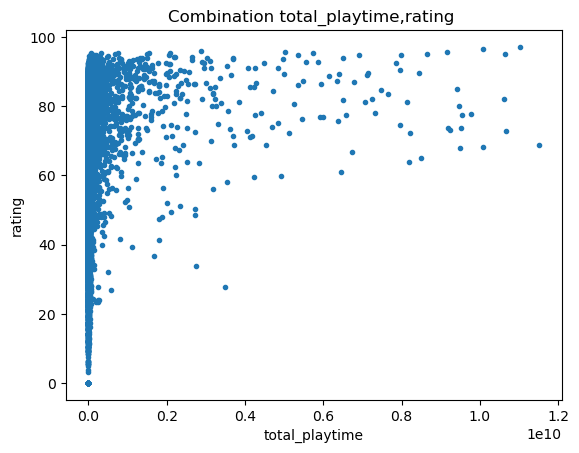

In [37]:
xCol = 'total_playtime'
yCol = 'rating' 

#data = pDF.sort_values(by='estimated_revenue',ascending=False).head(1)
data = topPDF.sort_values(by='total_playtime',ascending=True).head(len(topPDF.index)-50)

color =  np.array(['red','blue'])
plt.scatter(marker='.',x=data[xCol],y=data[yCol])
plt.xlabel(xCol)
plt.ylabel(yCol)
plt.title('Combination '+xCol+','+yCol +' ')

In [38]:
pDF[['total_playtime','type']]

,total_playtime,type
0,176120000000,Paid
1,1385000000,Paid
2,935000000,Paid
3,1290000000,Paid
4,3120000000,Paid
...,...,...
27070,0,Paid
27071,0,Paid
27072,0,Paid
27073,0,Paid


In [39]:
# IDEE:Scatter plot mit ratings * playtime rank, color: Playtime Gruppen (top 25,50, ...)
# je besser das rating desto höher ist das rating 

In [40]:
topRatedGames = pDF.sort_values(by='rating',ascending=False).head(math.ceil(27000*0.1))

In [41]:
topRatedGamesGrouped = topRatedGames[['release_year','appid']].groupby('release_year').count()
allGamesPerYear = pDF[['release_year','appid']].groupby('release_year').count()
topRatedGamesGrouped

merged = allGamesPerYear
merged['released games'] = merged['appid']
merged['top 10% rated games'] = topRatedGamesGrouped['appid']
merged['percent'] = merged['top 10% rated games'] * 100 / merged['released games']
del merged['appid']
merged

,released games,top 10% rated games,percent
release_year,,,
1997,1,1,100.000000
1998,1,1,100.000000
1999,2,1,50.000000
2000,2,1,50.000000
2001,4,3,75.000000
2002,1,1,100.000000
2003,3,1,33.333333
2004,6,5,83.333333
2005,6,2,33.333333


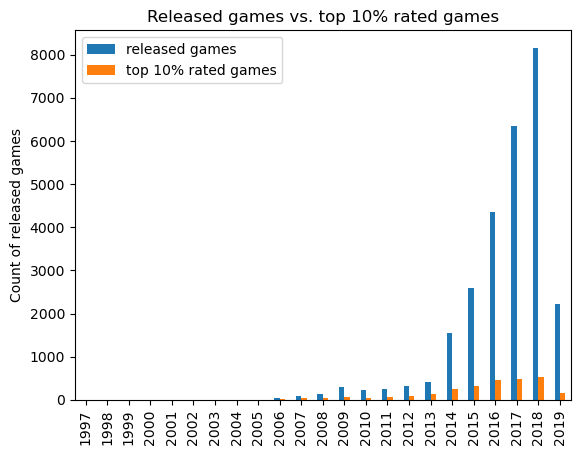

In [42]:
ax = merged.plot(y=['released games','top 10% rated games'], kind='bar', stacked=False)
ax.set_xlabel('')
ax.set_ylabel('Count of released games')
ax.set_title('Released games vs. top 10% rated games')
plt.show()

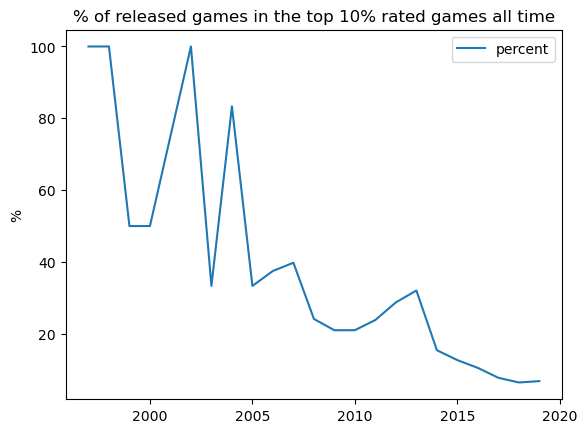

In [43]:
ax = merged.plot(y=['percent'])
ax.set_xlabel('')
ax.set_ylabel('%')
ax.set_title('% of released games in the top 10% rated games all time')
plt.show()

In [44]:
pDF

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,owners_low_bound,owners_high_bound,total_ratings,rating_ratio,rating,release_year,platforms_all,linux,mac,windows,top_tag,type,total_playtime,estimated_revenue
0,10,Counter-Strike,2000-11-01,1,[Valve],[Valve],"[windows, mac, linux]",0,"[Multi-player, Online Multi-Player, Local Mult...",Action,"[Action, FPS, Multiplayer]",0,124534,3339,17612,317,7.19,10000000,20000000,127873,0.973888,95.975678,2000,linux and mac and windows,1,1,1,Action,Paid,176120000000,71900000.0
1,20,Team Fortress Classic,1999-04-01,1,[Valve],[Valve],"[windows, mac, linux]",0,"[Multi-player, Online Multi-Player, Local Mult...",Action,"[Action, FPS, Multiplayer]",0,3318,633,277,62,3.99,5000000,10000000,3951,0.839787,80.508259,1999,linux and mac and windows,1,1,1,Action,Paid,1385000000,19950000.0
2,30,Day of Defeat,2003-05-01,1,[Valve],[Valve],"[windows, mac, linux]",0,"[Multi-player, Valve Anti-Cheat enabled]",Action,"[FPS, World War II, Multiplayer]",0,3416,398,187,34,3.99,5000000,10000000,3814,0.895648,85.823915,2003,linux and mac and windows,1,1,1,FPS,Paid,935000000,19950000.0
3,40,Deathmatch Classic,2001-06-01,1,[Valve],[Valve],"[windows, mac, linux]",0,"[Multi-player, Online Multi-Player, Local Mult...",Action,"[Action, FPS, Multiplayer]",0,1273,267,258,184,3.99,5000000,10000000,1540,0.826623,78.126542,2001,linux and mac and windows,1,1,1,Action,Paid,1290000000,19950000.0
4,50,Half-Life: Opposing Force,1999-11-01,1,[Gearbox Software],[Valve],"[windows, mac, linux]",0,"[Single-player, Multi-player, Valve Anti-Cheat...",Action,"[FPS, Action, Sci-fi]",0,5250,288,624,415,3.99,5000000,10000000,5538,0.947996,91.260480,1999,linux and mac and windows,1,1,1,FPS,Paid,3120000000,19950000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,[SHEN JIAWEI],[SHEN JIAWEI],[windows],0,"[Single-player, Steam Achievements]",Adventure;Casual;Indie,"[Adventure, Indie, Casual]",7,3,0,0,0,2.09,0,20000,3,1.000000,67.059371,2019,windows,0,0,1,Adventure,Paid,0,0.0
27071,1065570,Cyber Gun,2019-04-23,1,[Semyon Maximov],[BekkerDev Studio],[windows],0,[Single-player],Action;Adventure;Indie,"[Action, Indie, Adventure]",0,8,1,0,0,1.69,0,20000,9,0.888889,66.666667,2019,windows,0,0,1,Action,Paid,0,0.0
27072,1065650,Super Star Blast,2019-04-24,1,[EntwicklerX],[EntwicklerX],[windows],0,"[Single-player, Multi-player, Co-op, Shared/Sp...",Action;Casual;Indie,"[Action, Indie, Casual]",24,0,1,0,0,3.99,0,20000,1,0.000000,0.000000,2019,windows,0,0,1,Action,Paid,0,0.0
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,[Yustas Game Studio],[Alawar Entertainment],"[windows, mac]",0,"[Single-player, Steam Cloud]",Adventure;Casual;Indie,"[Indie, Casual, Adventure]",0,2,0,0,0,5.19,0,20000,2,1.000000,64.079515,2019,mac and windows,0,1,1,Indie,Paid,0,0.0


In [45]:
pDF['owners_low_bound']

0        10000000
1         5000000
2         5000000
3         5000000
4         5000000
           ...   
27070           0
27071           0
27072           0
27073           0
27074           0
Name: owners_low_bound, Length: 27075, dtype: int64

In [46]:
# Zusammenhang developer/publisher zu rating

In [51]:
windowsCount = pDF[['windows']].groupby(['windows']).sum()

<AxesSubplot:>

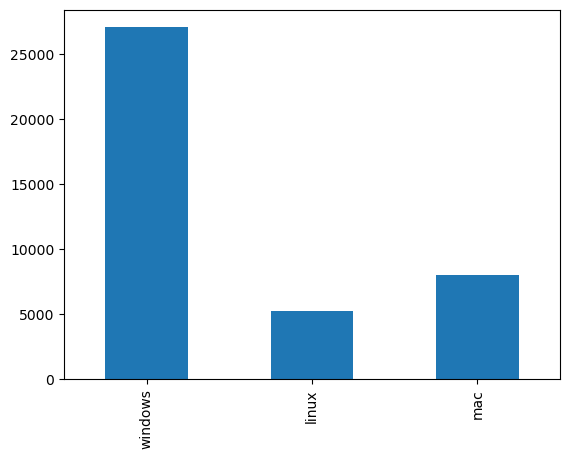

In [60]:
pDF[['windows','linux','mac']].sum().plot(kind='bar', stacked=False)

<AxesSubplot:xlabel='windows,linux,mac'>

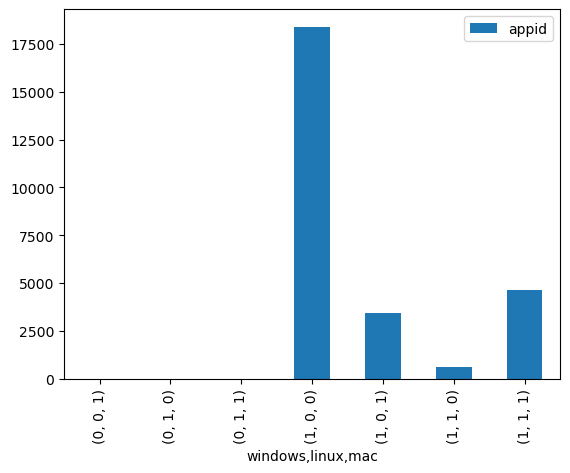

In [63]:
pDF[['windows','linux','mac','appid']].groupby(['windows','linux','mac']).count().plot(kind='bar', stacked=False)

In [104]:
def andFilter(row,column,values):
    return set(values).issubset(set(row[column])) 

def orFilter(row,column,values):
    return any(item in row[column] for item in values)
  
def isFilter(row,column,values):
    return sorted(row[column]) == sorted(values)

#pDF[pDF.apply(lambda row: andFilter(row,'platforms',['windows','linux','mac']), axis=1)]
#pDF[pDF.apply(lambda row: orFilter(row,'platforms',['linux','mac']), axis=1)]
#pDF[pDF.apply(lambda row: isFilter(row,'platforms',['mac','windows']), axis=1)]


#pDF.loc[filterFu('platforms',['windows','linux','mac'])]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,owners_low_bound,owners_high_bound,total_ratings,rating_ratio,rating,release_year,platforms_all,linux,mac,windows,top_tag,type,total_playtime,estimated_revenue
20,500,Left 4 Dead,2008-11-17,1,[Valve],[Valve],"[windows, mac]",0,"[Single-player, Multi-player, Co-op, Steam Ach...",Action,"[Zombies, Co-op, FPS]",73,17951,948,897,278,7.19,5000000,10000000,18899,0.949839,92.533238,2008,mac and windows,0,1,1,Zombies,Paid,4485000000,35950000.0
33,1530,Multiwinia,2008-09-19,1,[Introversion Software],[Introversion Software],"[windows, mac]",0,"[Single-player, Multi-player, Steam Achievements]",Indie,"[Indie, RTS, Strategy]",12,368,75,121,224,7.19,500000,1000000,443,0.830700,76.440605,2008,mac and windows,0,1,1,Indie,Paid,60500000,3595000.0
61,2500,Shadowgrounds,2006-05-08,1,[Frozenbyte],[Frozenbyte],"[windows, mac]",0,"[Single-player, Shared/Split Screen, Steam Tra...",Action,"[Action, Sci-fi, Top-Down Shooter]",0,973,248,186,258,3.99,500000,1000000,1221,0.796888,74.999932,2006,mac and windows,0,1,1,Action,Paid,93000000,1995000.0
67,2630,Call of Duty® 2,2006-10-13,1,"[Infinity Ward, Aspyr (Mac)]","[Activision, Aspyr (Mac)]","[windows, mac]",0,"[Single-player, Multi-player]",Action,"[Action, World War II, FPS]",0,2434,236,750,1041,14.99,200000,500000,2670,0.911610,86.922202,2006,mac and windows,0,1,1,Action,Paid,150000000,2998000.0
86,3170,King's Bounty: Armored Princess,2009-11-19,1,[Katauri Interactive],[1C Entertainment],"[windows, mac]",0,"[Single-player, Steam Cloud]",RPG;Strategy,"[RPG, Turn-Based Strategy, Strategy]",0,482,53,1422,1429,7.99,200000,500000,535,0.900935,83.299814,2009,mac and windows,0,1,1,RPG,Paid,284400000,1598000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27010,1054980,The Cat and the Box,2019-04-20,1,[Eli Schroeder],[Eli Schroeder],"[windows, mac]",0,[Single-player],Indie,"[Indie, Story Rich, First-Person]",0,3,0,0,0,2.09,0,20000,3,1.000000,67.059371,2019,mac and windows,0,1,1,Indie,Paid,0,0.0
27019,1055970,Argonauts Agency: Pandora's Box,2019-04-17,1,[Workroom7],[Workroom7],"[windows, mac]",0,"[Single-player, Steam Achievements, Steam Cloud]",Casual;Simulation;Strategy,"[Strategy, Casual, Simulation]",29,1,0,0,0,4.79,0,20000,1,1.000000,59.416365,2019,mac and windows,0,1,1,Strategy,Paid,0,0.0
27049,1059710,New Yankee 6: In Pharaoh's Court,2019-04-03,1,[Yustas Game Studio],[Alawar Entertainment],"[windows, mac]",0,"[Single-player, Steam Cloud]",Adventure;Casual;Indie,"[Indie, Casual, Adventure]",0,2,0,0,0,5.19,0,20000,2,1.000000,64.079515,2019,mac and windows,0,1,1,Indie,Paid,0,0.0
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,[Yustas Game Studio],[Alawar Entertainment],"[windows, mac]",0,"[Single-player, Steam Cloud]",Adventure;Casual;Indie,"[Indie, Casual, Adventure]",0,2,0,0,0,5.19,0,20000,2,1.000000,64.079515,2019,mac and windows,0,1,1,Indie,Paid,0,0.0


In [82]:
platforms = pDF['platforms'][27070]
platforms in ['mac']

False